# Vaccination Tweets: EDA, Sentiment Analyis

Agenda:
+ Frequency
    + most frequent words in tweets
    + look at most popular hashtags (in 'text' and in 'hashtags')
    + what is the most tweeted-about vaccine?
+ Time
    + Which vaccine "trends" in tweets? (time series)
    + Do different vaccines trend at different times as tweet subjects?

+ Sentiment
    + vaccine most closely connected to negative/positive sentiment
    + most influential sources who tweet positive/negative/neutral about vaccines in general
    + locations (uncleared) with the most positive, negative, neutral tweets
    + Positive, negative, neutral: which gets more retweets / are liked more?

(Measuring general attitude via tweets: how many people tweet by population, how many by population tweet about vaccines, how well are vaccinations monitored)

+ id:
+ user_name:
+ user_location: entered by user
+ user_description: entered by user
+ user_created: date of when the account was opened
+ user_followers: number of users which follow a specified user
+ user_friends: number of users which a specified user follows
+ user_favourites: 
+ user_verified: accounts of officially recognized organizations, users with many followers
+ date: date of tweet
+ text: text of the tweet
+ hashtags: hashtags user in the tweet
+ source: 
+ retweets: number of retweets
+ favorites:
+ is_retweet: whether the tweets is a retweet or not

Added:
+ day: 

In [271]:
# Main data packages. 
import numpy as np
import pandas as pd
from datetime import datetime

import pickle

#text processing, NLP modules
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

#sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
#plotting
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [272]:
#nltk.download('punkt')
#nltk.download('wordnet')

In [273]:
df = pd.read_csv("Data/vaccination_tweets.csv")

In [274]:
df_tweety = df.copy()

In [275]:
df_tweety

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38542,1372433256537235459,Rising Bharat,Village,Bharat is Rising,2021-03-02 08:31:23,625,0,0,False,2021-03-18 06:22:41,The Sputnik V is under review for emergency us...,NaN,Twitter Web App,1,7,False
38543,1372430850982350853,Bright Uzbekistan,Uzbekistan,Bright Uzbekistan is a new International magaz...,2021-01-11 09:21:03,18,182,59,False,2021-03-18 06:13:08,IT IS PLANNED TO START MASS VACCINATION IN UZB...,NaN,Twitter Web App,0,0,False
38544,1372428007403585538,Sputnik V,"Moscow, Russia",Sputnik V is the world’s first registered COVI...,2020-08-11 09:12:38,223700,142,678,True,2021-03-18 06:01:50,Austrian Chancellor Sebastian Kurz: Concerning...,['SputnikV'],Twitter for iPhone,83,226,False
38545,1372419998250115078,Sputnik,NaN,"Sputnik is a global wire, radio and digital ne...",2009-04-22 12:55:28,322326,306,24,True,2021-03-18 05:30:00,Norwegian politicians calling to cut #SputnikV...,['SputnikV'],TweetDeck,6,16,False


In [276]:
shape = df_tweety.shape
print('The unmodified vaccination tweets dataset contains {} columns and {} rows.'.format(shape[1], shape[0]))

The unmodified vaccination tweets dataset contains 16 columns and 38547 rows.


In [277]:
df_tweety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38547 entries, 0 to 38546
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                38547 non-null  int64 
 1   user_name         38547 non-null  object
 2   user_location     29767 non-null  object
 3   user_description  35940 non-null  object
 4   user_created      38547 non-null  object
 5   user_followers    38547 non-null  int64 
 6   user_friends      38547 non-null  int64 
 7   user_favourites   38547 non-null  int64 
 8   user_verified     38547 non-null  bool  
 9   date              38547 non-null  object
 10  text              38547 non-null  object
 11  hashtags          30330 non-null  object
 12  source            38514 non-null  object
 13  retweets          38547 non-null  int64 
 14  favorites         38547 non-null  int64 
 15  is_retweet        38547 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 4.2+ MB


In [278]:
df_tweety.describe().round(2)

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,3.854700e+04,38547.00,38547.00,38547.00,38547.00,38547.00
mean,1.365051e+18,109675.74,1309.57,15013.42,3.11,13.75
std,8.619936e+15,882398.75,6020.04,41677.98,33.87,184.20
min,1.337728e+18,0.00,0.00,0.00,0.00,0.00
25%,1.362003e+18,120.00,144.00,360.00,0.00,0.00
50%,1.366887e+18,577.00,417.00,2146.00,0.00,1.00
75%,1.371547e+18,2780.50,1189.00,11272.00,1.00,4.00
max,1.375348e+18,14906907.00,380428.00,1205878.00,2360.00,22815.00


In [279]:
df_tweety.isnull().sum()

id                     0
user_name              0
user_location       8780
user_description    2607
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            8217
source                33
retweets               0
favorites              0
is_retweet             0
dtype: int64

No tweets in this dataset are retweets.

In [280]:
df_tweety["is_retweet"].unique()

array([False])

In [281]:
#Insert column 'day' to map the vaccination progress data set
df_tweety['day'] = pd.to_datetime(df_tweety.date).dt.date

In [282]:
df_tweety.dtypes

id                   int64
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
retweets             int64
favorites            int64
is_retweet            bool
day                 object
dtype: object

## Dropping stuff(?)

In [283]:
#'user_location' is a highly diverse category
df_tweety.user_location.nunique()

8098

In [284]:
df_tweety = df_tweety.drop(['id', 'user_created', 'is_retweet', 'source', 'user_description'], axis=1).drop_duplicates(['user_name', 'text'], keep='last')

In [285]:
#df_tweety.index.name = 'id'

In [286]:
df_tweety.reset_index(inplace=True)

In [287]:
df_tweety

,index,user_name,user_location,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,retweets,favorites,day
0,0,Rachel Roh,"La Crescenta-Montrose, CA",405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],0,0,2020-12-20
1,1,Albert Fong,"San Francisco, CA",834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,1,1,2020-12-13
2,2,eli🇱🇹🇪🇺👌,Your Bed,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0,0,2020-12-12
3,3,Charles Adler,"Vancouver, BC - Canada",49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,446,2129,2020-12-12
4,4,Citizen News Channel,NaN,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",0,0,2020-12-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38515,38542,Rising Bharat,Village,625,0,0,False,2021-03-18 06:22:41,The Sputnik V is under review for emergency us...,NaN,1,7,2021-03-18
38516,38543,Bright Uzbekistan,Uzbekistan,18,182,59,False,2021-03-18 06:13:08,IT IS PLANNED TO START MASS VACCINATION IN UZB...,NaN,0,0,2021-03-18
38517,38544,Sputnik V,"Moscow, Russia",223700,142,678,True,2021-03-18 06:01:50,Austrian Chancellor Sebastian Kurz: Concerning...,['SputnikV'],83,226,2021-03-18
38518,38545,Sputnik,NaN,322326,306,24,True,2021-03-18 05:30:00,Norwegian politicians calling to cut #SputnikV...,['SputnikV'],6,16,2021-03-18


In [288]:
#df_tweety = df_tweety.reset_index(drop='True')

In [289]:
df_tweety.to_csv('Data/tweety.csv', index=False)

In [290]:
# Some users tweet more.
(len(df_tweety) - df_tweety.user_name.nunique())/len(df_tweety)

0.43852544132917964

## User Influence

### Most active users

In [291]:
df_tweety_activity = df_tweety.groupby(['user_name'])['index'].count().sort_values(ascending=False)[:25]
df_tweety_activity

user_name
Workout Solutions        731
Sputnik                  235
Xukki🌍                   202
Sputnik V                152
China Economy            145
ILKHA                    133
MaryRobotic              109
William Owen             103
Tradia Inc               100
People's Daily, China     91
Shen Shiwei沈诗伟            90
New Straits Times         88
ChineseEmbassyManila      83
Brazil SFE                81
CGTN                      68
The Peninsula Qatar       60
People's Daily app        58
CCTV+                     54
Tibetans                  53
RiverRising               53
@shalinisharma87          52
IANS Tweets               52
China News 中国新闻网          52
Hilary                    50
🕷Financial Bear 3.5%      49
Name: index, dtype: int64

However, more relevant than activity is influence. I propose defining it as the square root of a weighted product of 'user_followers', 'user_friends', 'user_favourites' and 'retweets' which is slightly reduced, if a user does not have the 'verified'-status. We find that news organizations dominate in that category. This is relevant because they also share an evaluate vaccination news. The influence hypothesis would have some support, if other users mirorred the sentiment pattern of the influential users.

In [292]:
#new feature user influence
def user_influence(df):
    fact = 0
    if df['user_verified'] == 'True':
        fact=1.0
    else:
        fact=0.8
    influence = np.sqrt(df['user_followers']*0.35+df['user_friends']*0.15+df['user_favourites']*0.15+df['retweets']*0.35)*fact
    return np.round(influence)

df_tweety['user_infl'] = df_tweety.apply(user_influence,axis=1)

In [293]:
influence_factor = df_tweety.groupby(['user_name'])['user_infl'].mean().round().sort_values(ascending=False)
influence_factor = pd.DataFrame(influence_factor)
influence_factor['user_infl'].quantile(.99)


201.72999999999956

## User location

User location is highly relevant for in-depth analysis but a difficult to use feature as its entries are unsystematic.

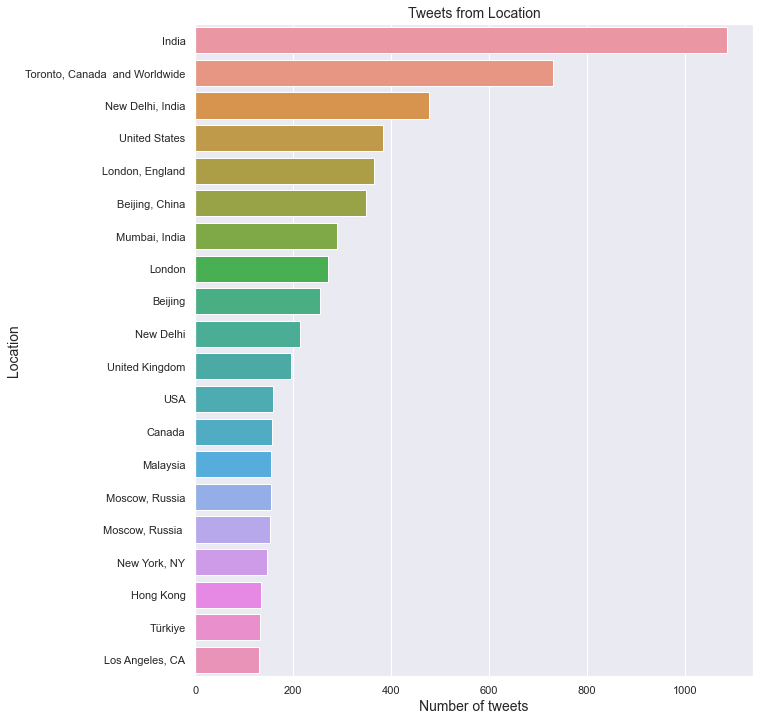

In [294]:
#user_location columns is very diverse
plt.figure(figsize=(10,12))
sns.barplot(df_tweety["user_location"].value_counts().values[0:20],
            df_tweety["user_location"].value_counts().index[0:20]);
plt.title("Tweets from Location",fontsize=14)
plt.xlabel("Number of tweets",fontsize=14)
plt.ylabel("Location",fontsize=14)
plt.show()

It proved at least possible to systematically access a tweets from the federal states of the US via often used state abbreviations in significant numbers in a way that roughly corresponds to the size of the respective states.

In [295]:
df_US = df_tweety.copy()

In [296]:
states_dict = {
            'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa',
            'AZ': 'Arizona','CA': 'California','CO': 'Colorado','CT': 'Connecticut',
            'DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia',
            'GU': 'Guam','HI': 'Hawaii','IA': 'Iowa','ID': 'Idaho','IL': 'Illinois',
            'IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana',
            'MA': 'Massachusetts','MD': 'Maryland','ME': 'Maine','MI': 'Michigan',
            'MN': 'Minnesota','MO': 'Missouri','MP': 'Northern Mariana Islands',
            'MS': 'Mississippi','MT': 'Montana','NA': 'National','NC': 'North Carolina',
            'ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire','NJ': 'New Jersey',
            'NM': 'New Mexico','NV': 'Nevada','NY': 'New York','OH': 'Ohio','OK': 'Oklahoma',
            'OR': 'Oregon','PA': 'Pennsylvania','PR': 'Puerto Rico','RI': 'Rhode Island',
            'SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee','TX': 'Texas',
            'UT': 'Utah','VA': 'Virginia','VI': 'Virgin Islands','VT': 'Vermont',
            'WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia','WY': 'Wyoming'
            }
states_dict_inv = {v: k for k, v in states_dict.items()}

In [297]:
# for US tweets extract state abbreviations for a new STATE column
# helper function to extract state origin of every tweet
def get_state(x):
    
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
              "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
              "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
              "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
              "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

    abbrev = x.split(',')[-1].lstrip().upper()
    if abbrev in states:
        return abbrev
    else:
        return 0


In [298]:
# create abreviated states column
df_US['us_state'] = df_US['user_location'].astype(str).apply(get_state)
df_US = df_US[df_US['us_state'] != 0]
len(df_US)
df_US

,index,user_name,user_location,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,retweets,favorites,day,user_infl,us_state
0,0,Rachel Roh,"La Crescenta-Montrose, CA",405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],0,0,2020-12-20,24.0,CA
1,1,Albert Fong,"San Francisco, CA",834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,1,1,2020-12-13,16.0,CA
19,19,Alex Vie,"Los Angeles, CA",125,442,5401,False,2020-12-12 15:10:09,The trump administration failed to deliver on ...,"['COVIDIOTS', 'coronavirus', 'CovidVaccine']",0,0,2020-12-12,24.0,CA
21,21,"Richard Dunne, MD","Rochester, NY",1982,608,9110,False,2020-12-12 14:59:25,Anyone wondering why day after #PfizerBioNTech...,['PfizerBioNTech'],0,2,2020-12-12,37.0,NY
32,32,Contagion,"Cranbury, NJ",5998,815,5867,False,2020-12-12 13:00:00,#ICYMI The #FDA Authorized the #PfizerBioNTech...,"['ICYMI', 'FDA', 'PfizerBioNTech', 'COVID19', ...",0,1,2020-12-12,45.0,NJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38017,38044,Manu,"Chicago, IL",2429,981,62444,False,2021-03-21 02:59:42,Our own private Boedo. \n.\n.\n.\n#milanga #mi...,"['milanga', 'milanesa', 'milanesanapolitana', ...",0,0,2021-03-21,81.0,IL
38253,38280,Don Hackett,"Houston, TX",19425,53,4591,False,2021-03-19 14:32:06,#India Biopharma to Produce 200 Million #Sputn...,"['India', 'SputnikV', 'Vaccine']",0,2,2021-03-19,69.0,TX
38369,38396,EpiphanyOnWallStreet,"New York, NY",7838,6978,22034,False,2021-03-19 01:05:03,China &amp; Russia Vaccines Defeat Cold War Vi...,['CoronaVac'],1,2,2021-03-19,67.0,NY
38392,38419,Riaz Haq,"Silicon Valley, CA",3305,344,15725,False,2021-03-18 19:45:11,#Pakistan imports #COVID19 #vaccines for priva...,"['Pakistan', 'COVID19', 'vaccines', 'Russia', ...",3,6,2021-03-18,48.0,CA


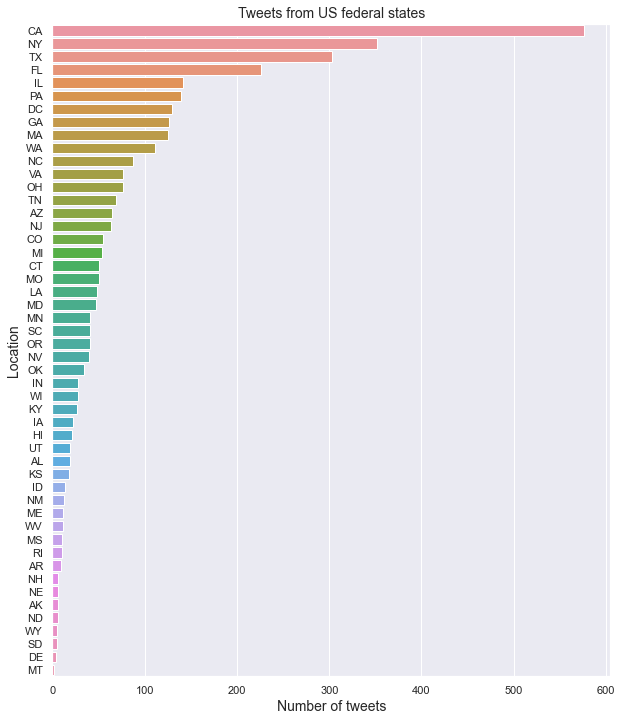

In [299]:
plt.figure(figsize=(10,12))
sns.barplot(df_US.us_state.value_counts().values[0:50],
            df_US.us_state.value_counts().index[0:50]);
plt.title("Tweets from US federal states",fontsize=14)
plt.xlabel("Number of tweets",fontsize=14)
plt.ylabel("Location",fontsize=14)
plt.show()

In [300]:
df_US.groupby(['user_name'])['user_infl'].mean().sort_values(ascending=False)[:20]#/df_US.us_state.count_values

user_name
PETA                     503.0
News12LI                 283.0
Dr. Yaacoub Hallak       276.0
surfspup                 274.0
CGTN America             256.0
Freddie Roach            250.0
KVUE News                226.0
rachel palmer            200.0
Rik Walters              196.0
Kimberly Blodgett        193.0
WAFB                     189.0
Samuel Jacob Cooper Ⓥ    188.0
(HL)                     185.0
Carolyn Adams            185.0
Jeana Mamer              184.0
Kyle S 🏳️‍🌈 💜💙🏳️‍🌈       176.0
Prof. Akiko Iwasaki      174.5
Lucia Fasano             174.0
David Knight             172.0
opposablethumbs          169.5
Name: user_infl, dtype: float64

## Most popular tweets

### Popularity measure: number of *retweets*

In [301]:
df_tweety_stat1 = df_tweety.sort_values(by='retweets', ascending=False)
print('Retweets (mean):', round(df_tweety_stat1['retweets'].mean(),2), '\n')

print('10 most responded tweets:')
df_stat1 = pd.DataFrame(df_tweety_stat1['text'].iloc[:10])
df_stat1

Retweets (mean): 3.11 

10 most responded tweets:


,text
17103,"Got my jab. For the curious, it was #Covaxin. ..."
7117,New research published in Microbiology &amp; I...
24248,"#Covaxin 🇮🇳 , made by Hyderabad-based Bharat B..."
38451,A batch of fake Sputnik V vaccines was confisc...
17528,Prime Minister Narendra Modi choose early morn...
23695,This is not a queue for a Covid vaccine\nThis ...
20906,#BREAKING : Bharat Biotech says its #Covaxin s...
20516,It is tough when have to play the sauve Amrika...
13089,AIIMS nurse who gave the #Covaxin jab to Prime...
21507,The Opposition campaign to denigrate #Covaxin ...


### Popularity measure: number of *likes*

In [302]:
df_tweety_stat2 = df_tweety.sort_values(by='favorites', ascending=False)
print('Likes (mean):', round(df_tweety_stat2['favorites'].mean(),2), '\n')
print('10 most liked tweets:')
df_tweety_stat2['text'].iloc[:10]

Likes (mean): 13.76 

10 most liked tweets:


17103    Got my jab. For the curious, it was #Covaxin. ...
24248    #Covaxin 🇮🇳 , made by Hyderabad-based Bharat B...
30783    Got my #covaxin jab yesterday .. absolutely no...
17528    Prime Minister Narendra Modi choose early morn...
34974    That. Just. Happened.\n\n#Moderna #CovidVaccin...
20906    #BREAKING : Bharat Biotech says its #Covaxin s...
13089    AIIMS nurse who gave the #Covaxin jab to Prime...
20905    Phase 3 Results of #COVAXIN - announced by @Bh...
27519    I dislike shots as much as anyone. But I want ...
14309    Hon’ble PM @narendramodi We are all watching h...
Name: text, dtype: object

The categories appear to partly overlap. Below, we will look at the sentiments that of the sentiments of popular and influential tweets.

Here it already shows that most tweets in the dataset are incomplete. We will try to deal with this systemtaic limitation to analysis further below.

## Feature 'text'

### Most frequent words

In [303]:
#remove stopwords
stopwords = nltk.corpus.stopwords.words('english') + ['i', 'I', 'The', 'the', 'get', 'got', '-', 'one']
df_tweety.text = df_tweety.text.apply(lambda x:' '.join([word for word in x.split() if word not in stopwords]))

In [304]:
tweet_words = []
for line in list(df_tweety['text']):
    words = line.split()
    for word in words:
        tweet_words.append(word.lower())
tweet_words=pd.Series(np.array(tweet_words))
frequency_ranking_words = tweet_words.value_counts()[:10].rename_axis('words_text_freq').reset_index(name='count')
frequency_ranking_words

,words_text_freq,count
0,vaccine,8513
1,#moderna,6181
2,first,4147
3,#covaxin,4115
4,#covid19,4070
5,#pfizerbiontech,3492
6,dose,3169
7,#vaccine,3064
8,#sputnikv,2855
9,covid-19,2052


In [305]:
print(frequency_ranking_words.words_text_freq.tolist())

['vaccine', '#moderna', 'first', '#covaxin', '#covid19', '#pfizerbiontech', 'dose', '#vaccine', '#sputnikv', 'covid-19']


Reporting getting a first vaccine dose is likely to be a very frequent tweet occasion.

### Most frequent hashtags

In [306]:
tweet_words_hasht = []
for line in df_tweety['text']:
    words = line.split()
    for word in words:
        if re.search('#[^\s]+', word):
            tweet_words_hasht.append(word)
tweet_words_hasht=pd.Series(np.array(tweet_words_hasht))
frequency_hashtags = tweet_words_hasht.value_counts()[:20].rename_axis('text_hasht_freq').reset_index(name='count')
frequency_hashtags

,text_hasht_freq,count
0,#Moderna,4978
1,#COVID19,3411
2,#Covaxin,3116
3,#PfizerBioNTech,2889
4,#SputnikV,2768
5,#vaccine,2621
6,#Sinopharm,1255
7,#OxfordAstraZeneca,1234
8,#CovidVaccine,1233
9,#Sinovac,1222


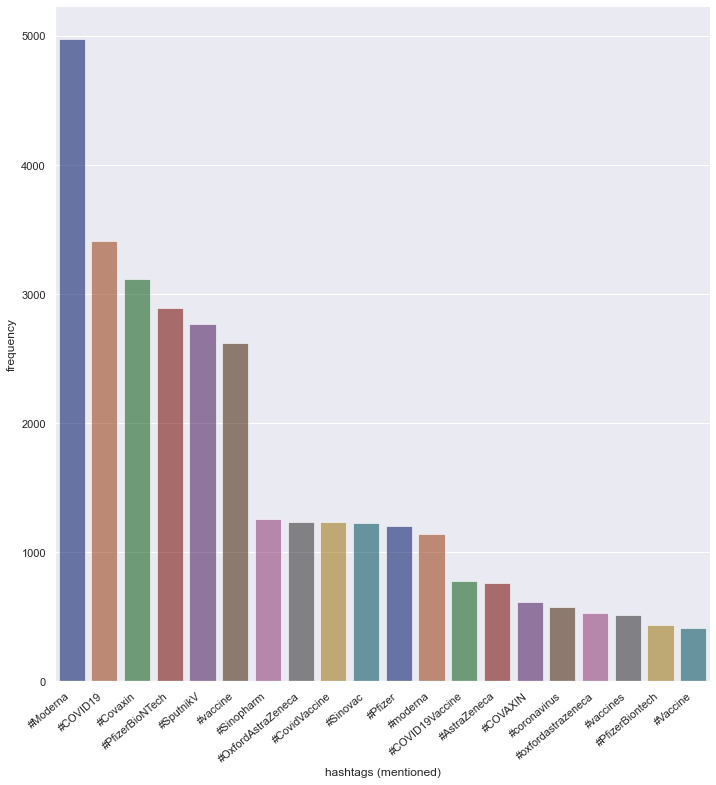

In [307]:
#f, ax = plt.subplots(figsize=(7, 5))

g = sns.catplot(
    data=frequency_hashtags, kind="bar",
    x="text_hasht_freq", y="count",# hue="sex",
    ci="sd", palette="dark", height=10, alpha=.6
)
#g.despine(left=True)
g.set_axis_labels("hashtags (mentioned)", "frequency")
g.set_xticklabels(rotation=40, ha="right")
#g.legend.set_title("")

### Most frequently mentioned twitter accounts @

In [308]:
twitter_accounts = []
for line in df_tweety['text']:
    words = line.split()
    for word in words:
        if re.search('@[^\s]+', word):
            twitter_accounts.append(word)
mentioned_accounts=pd.Series(np.array(twitter_accounts))
accounts = mentioned_accounts.value_counts()[:20].rename_axis('accounts').reset_index(name='count')

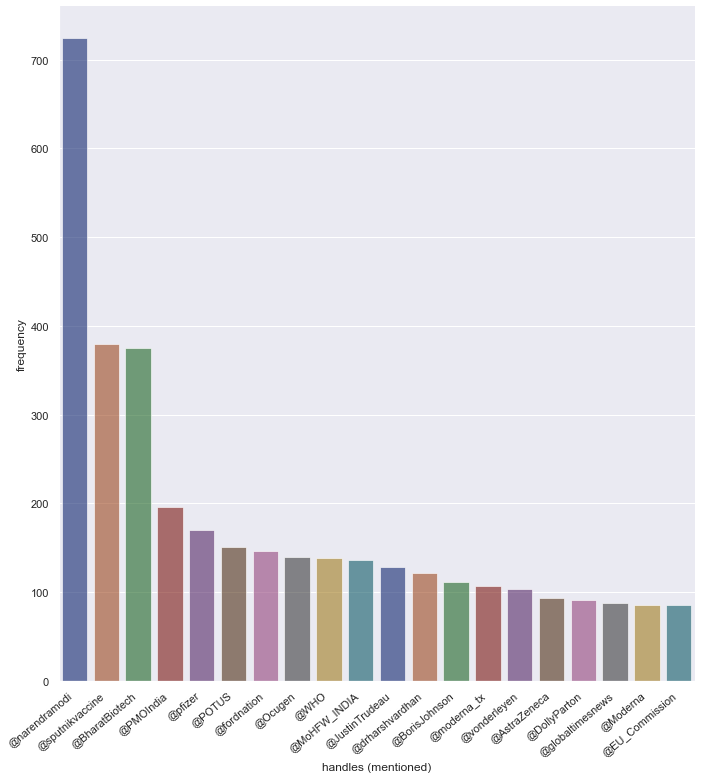

In [309]:
#f, ax = plt.subplots(figsize=(7, 5))

g = sns.catplot(
    data=accounts, kind="bar",
    x="accounts", y="count",# hue="sex",
    ci="sd", palette="dark", height=10, alpha=.6
)
#g.despine(left=True)
g.set_axis_labels("handles (mentioned)", "frequency")
g.set_xticklabels(rotation=40, ha="right")
#g.legend.set_title("")

We see that politicians, political institutions and vaccine producers are the most requently mentioned twitter accounts. This points towards vaccination being regarded as a political topic beyond a scientific one. Therefore, any em

## Feature 'hashtag'

### Most frequent hashtags

Lists in 'hashtags' are stored as strings

In [310]:
#for i, l in enumerate(df_tweety['hashtags']):
    #print("list",i,"is",type(l))

lst_ = "['erst', 'zweit', 'dritt']"

def clean_hashtag(name):
    name = name.replace("[", "")
    name = name.replace("]", "")
    name = name.replace("'", "")
    name_lst = name.split(",")
    hash_lst = list()
    for item in name_lst:
        item = item.strip()
        hash_lst.append(item)
    return hash_lst

In [311]:
df_tweety['hashtags'] = df_tweety['hashtags'].apply(eval)

TypeError: eval() arg 1 must be a string, bytes or code object

In [312]:
df_tweety['hashtags'] = df_tweety['hashtags'].fillna('[]')

def to_1D(Series):
    return pd.Series([x.lower() for lst in Series for x in lst])

hasht_freq = to_1D(df_tweety['hashtags']).value_counts()[:30].rename_axis('hasht_freq').reset_index(name='count')

In [313]:
df_tweety['hashtags'] = df_tweety['hashtags'].apply(eval)

In [314]:
df_tweety['hashtags'] = df_tweety['hashtags'].fillna('[]')

def to_1D(Series):
    return pd.Series([x.lower() for lst in Series for x in lst])

hasht_freq = to_1D(df_tweety['hashtags']).value_counts()[:20].rename_axis('hasht_freq').reset_index(name='count')
#print(hasht_freq.hasht_freq.tolist())

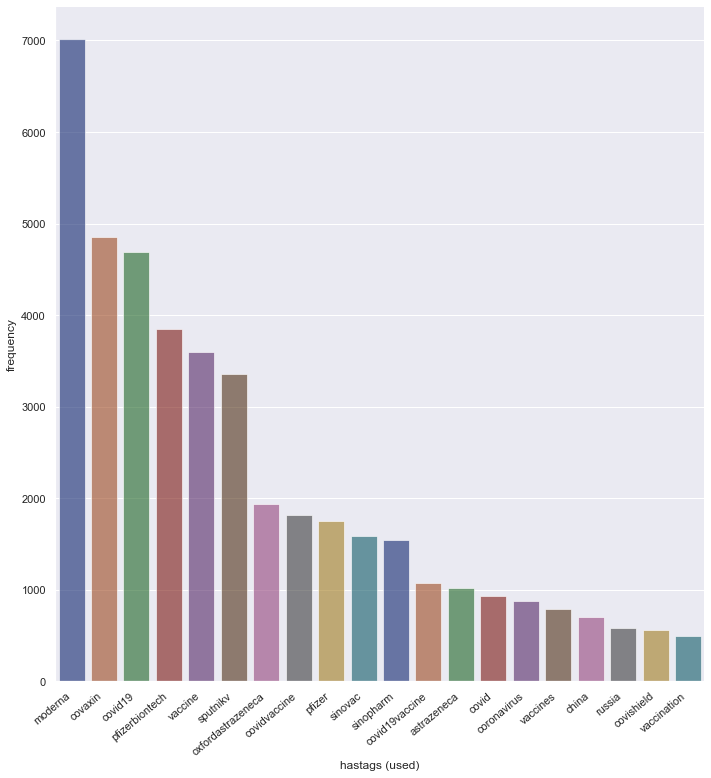

In [315]:
#f, ax = plt.subplots(figsize=(7, 5))

g = sns.catplot(
    data=hasht_freq, kind="bar",
    x="hasht_freq", y="count",# hue="sex",
    ci="sd", palette="dark", height=10, alpha=.6
)
#g.despine(left=True)
g.set_axis_labels("hastags (used)", "frequency")
g.set_xticklabels(rotation=40, ha="right")
#g.legend.set_title("")

In contrast, particular vaccines or the vaccination topic play the dominant role in the category of used hashtags. Politicians or institutions do not figure prominently in this category.

### Frequnt countries in 'hashtag'
We can however spot that countries get mentioned in used hashtags. China, Russia, India and the EU trend at the top. This might be relevant to compare with vaccination progress in these countries.

In [316]:
df_tweety['hashtags'] = df_tweety['hashtags'].fillna('[]')

def to_1D(Series):
    return pd.Series([x.upper() for lst in Series for x in lst if x.lower() in ['china', 'eu', 'india', 'usa', 'scotland', 'england', 'russia', 'uk', 'italy', 'germany', 'france', 'america', 'brazil', 'japan', 'canada', 'afghanistan', 'china']])

to_1D(df_tweety['hashtags']).value_counts()[:30].rename_axis('hasht_country_freq').reset_index(name='count')

,hasht_country_freq,count
0,CHINA,699
1,RUSSIA,580
2,EU,392
3,INDIA,368
4,UK,109
5,CANADA,103
6,ITALY,101
7,USA,82
8,BRAZIL,70
9,GERMANY,65


### Selection (vaccines, vaccination) from ranked hanstags (top 30) added to dataframe for further analysis

Idea: create df with vaccines in hashtags as columns and append it to df_tweety

In [317]:
def to_1D(Series):
    return pd.Series([x.lower() for lst in Series for x in lst])

unique_hasht = to_1D(df_tweety['hashtags']).value_counts()[:30]

In [318]:
def boolean_df(item_lists, unique_items):

    # Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask that returns a True-False list of whether a tag is in a taglist
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [319]:
hasht_bool = boolean_df(df_tweety['hashtags'], unique_hasht.keys())
#Drop non-vaccine related columns
hasht_bool.drop(['covid19', 'covid', 'china', 'russia', 'eu', 'india', 'covid_19', 'coronavirus'], axis=1)

,moderna,covaxin,pfizerbiontech,vaccine,sputnikv,oxfordastrazeneca,covidvaccine,pfizer,sinovac,sinopharm,...,vaccines,covishield,vaccination,vaccinated,pfizervaccine,bharatbiotech,covidvaccination,covid19vaccination,coronavaccine,mrna
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38515,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38516,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38517,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38518,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### @s mentioned in 'text' ranked, append columns to data frame

In [320]:
twitter_accounts = []
for tweet in df_tweety['text']:
    words = tweet.split()
    for word in words:
        if re.search('@[^\s]+', word):
            twitter_accounts.append(word)
mentioned_accounts=pd.Series(np.array(twitter_accounts))
accounts = mentioned_accounts.value_counts().rename_axis('accounts').reset_index(name='count')
accounts

,accounts,count
0,@narendramodi,724
1,@sputnikvaccine,380
2,@BharatBiotech,375
3,@PMOIndia,196
4,@pfizer,170
...,...,...
8744,@StrickerRoland,1
8745,@dyctiostelium,1
8746,@PACCM,1
8747,@Writer_DG,1


In [321]:
def to_1D(Series):
    return pd.Series([x for x in Series])

unique_handle = to_1D(mentioned_accounts).value_counts()[:30]
unique_handle

@narendramodi       724
@sputnikvaccine     380
@BharatBiotech      375
@PMOIndia           196
@pfizer             170
@POTUS              151
@fordnation         146
@Ocugen             140
@WHO                138
@MoHFW_INDIA        136
@JustinTrudeau      128
@drharshvardhan     122
@BorisJohnson       111
@moderna_tx         107
@vonderleyen        103
@AstraZeneca         93
@DollyParton         91
@globaltimesnews     88
@Moderna             86
@EU_Commission       85
@Swamy39             84
@EMA_News            83
@BioNTech            82
@NOVAVAX             81
@JoeBiden            71
@CPHO_Canada         70
@ANI                 65
@YouTube             63
@ICMRDELHI           63
@ImranKhanPTI        59
dtype: int64

In [322]:
def handle_df(item_lists, unique_items):

    # Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask that returns a True-False list of whether a tag is in a taglist
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [323]:
handle_bool = handle_df(mentioned_accounts, unique_handle.keys())
handle_bool

,@narendramodi,@sputnikvaccine,@BharatBiotech,@PMOIndia,@pfizer,@POTUS,@fordnation,@Ocugen,@WHO,@MoHFW_INDIA,...,@Swamy39,@EMA_News,@BioNTech,@NOVAVAX,@JoeBiden,@CPHO_Canada,@ANI,@YouTube,@ICMRDELHI,@ImranKhanPTI
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19437,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19438,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19439,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19440,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [324]:
df_tweety_vaccs = pd.concat([df_tweety, hasht_bool], axis=1)
df_tweety_vaccs = df_tweety_vaccs.drop(['user_followers', 'user_friends', 'user_favourites', 'hashtags', 'user_verified'], axis=1)

In [325]:
df_tweety_vaccs.to_csv('Data/tweety_vaccs.csv')

## Cleaning, feature engineering VADER

In [326]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['moderna', 'covaxin', 'covid19', 'pfizerbiontech', 'vaccine', 'sputnikv', 'oxfordastrazeneca', 'covidvaccine', 'pfizer', 'sinovac', 'sinopharm', 'covid19vaccine', 'astrazeneca', 'covid', 'coronavirus', 'vaccines', 'china', 'russia', 'covishield', 'vaccination', 'vaccinated', 'pfizervaccine', 'eu', 'india', 'covid_19', 'bharatbiotech', 'covidvaccination', 'covid19vaccination', 'coronavaccine', 'mrna', 'johnsonandjohnson', 'getvaccinated', 'biontech', 'narendramodi', 'hongkong', 'pakistan', 'covidvacccine', 'pmmodi', 'modernavaccine', 'ocgn', 'iran', 'nhs', 'coronavirusvaccine', 'ocugen', 'breaking', 'covidvaccines', 'aiims', 'russian', 'pfizercovidvaccine', 'vaccineswork', 'news', 'putin', 'uk', 'who', 'us', 'canada', 'italy', 'covidー19', 'covid19vaccines', 'israel', 'corona', 'hungary', 'zimbabwe', 'pandemic', 'covax', 'oxfordvaccine', 'usa', 'health', 'modi', 'vaccine', 'first', 'covid', 'dose', 'today', '19', 'vaccines', 'amp', 'shot', 'doses']
stopwords.extend(newStopWords)

Most frequent words and topic words are added to stopwords.

In [327]:
def clean_tweet_vader(x):
    ''' Pre process and convert texts to a list of words 
    method inspired by method from eliorc github repo: https://github.com/eliorc/Medium/blob/master/MaLSTM.ipynb'''
    x = str(x)
    x = x.lower()

    #remove twitter handlers
    x = re.sub('@[^\s]+','',x)
    #remove hashtags
    x = re.sub('#[^\s]+','',x)
    #remove URLs
    x = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', x)
    #remove punctuation
    #x = x.replace('[^\w\s]','')
    #remove single characters
    x = re.sub(r'\s+[a-zA-Z0-9]\s+', '', x)
    #substitute multiple spaces with single space
    x = re.sub(r'\s+', ' ', x, flags=re.I)
    #remove linebreaks
    x = re.sub('\n', '', x)
    #remove special characters
    x = ' '.join(re.findall(r'\w+', x))
    #stemming
    #x = ' '.join([stemmer.stem(word) for word in x.split() ])
    #lemmatizing
    #x = ' '.join([lemmatizer.lemmatize(word) for word in x.split() ])
    #removing stop words
    x = ' '.join([word for word in x.split() if word not in stopwords])
    #removing numbers
    x = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", x)
    #x = x.split()

    return x

In [328]:
df_tweety.text = df_tweety.text.apply(lambda x: clean_tweet_vader(x))

Try to turn abbreviations into regular strings

In [329]:
import csv

#helper function to turn abbreviations into words and delete slang
def translator(user_string):
    user_string = user_string.split(" ")
    j = 0
    for _str in user_string:
        # File path which consists of Abbreviations.
        fileName = "/Users/JDSeo/Desktop/Daily-Neural-Network-Practice-2/NLP/cleaning/slang.txt"
        with open(fileName, "r") as myCSVfile:
            # Reading file as CSV with delimiter as "=", so that abbreviation are stored in row[0] and phrases in row[1]
            dataFromFile = csv.reader(myCSVfile, delimiter="=")
            # Removing Special Characters.
            _str = re.sub('[^a-zA-Z0-9]+', '', _str)
            for row in dataFromFile:
                # Check if selected word matches short forms[LHS] in text file.
                if _str.upper() == row[0]:
                    # If match found replace it with its appropriate phrase in text file.
                    user_string[j] = row[1]
            myCSVfile.close()
        j = j + 1
    return ' '.join(user_string)

# Sentiment analysis 1 (VADER)

In [330]:
#!pip install vaderSentiment

In [331]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [332]:
analyser = SentimentIntensityAnalyzer()

scores=[]
for i in range(len(df_tweety['text'])):
    
    score = analyser.polarity_scores(df_tweety['text'][i])
    score=score['compound']
    scores.append(score)
    
sentiment=[]
for i in scores:
    if i>=0.05:
        sentiment.append('positive')
    elif i<=(-0.05):
        sentiment.append('negative')
    else:
        sentiment.append('neutral')

df_tweety['sentiment']=pd.Series(np.array(sentiment))
df_tweety_vaccs['sentiment']=pd.Series(np.array(sentiment))

In [333]:
df_tweety_infl = df_tweety[df_tweety['user_infl']>192]
df_tweety_vaccs_infl = df_tweety_vaccs[df_tweety_vaccs['user_infl']>192]

## Overview, basic statistics

In [334]:
scores = pd.Series(np.array(scores))
df_scores = pd.DataFrame(scores).reset_index()
df_scores2 = df_scores.rename(columns={0: 'sentiment'})

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='index', ylabel='sentiment'>

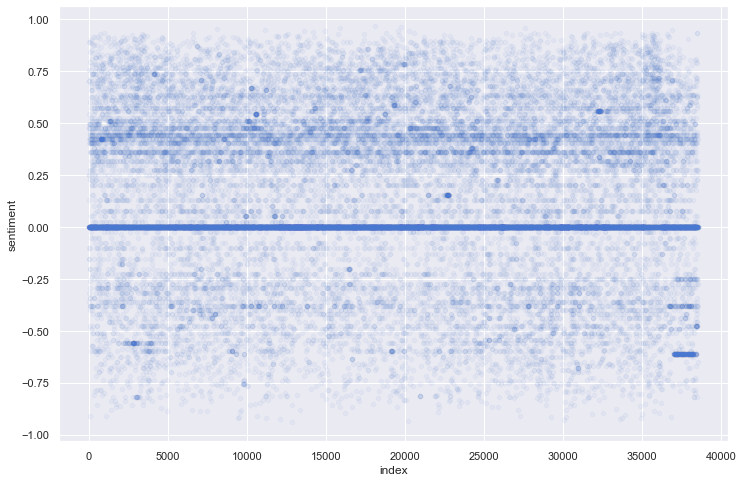

In [335]:
df_scores2.plot.scatter(x='index', y='sentiment', alpha=0.05)

In [336]:
df_tweety.sentiment.value_counts()/len(df_tweety)

neutral     0.443795
positive    0.387591
negative    0.168614
Name: sentiment, dtype: float64

Distribution of sentiments per day

In [337]:
daily_sent = df_tweety.groupby(['day', 'sentiment'])['index'].count()
df_daily_sent = pd.DataFrame(daily_sent)#.reset_index()#.rename(columns={"index": "count"})
df_daily_sent

index
day        sentiment       
2020-12-12 negative       9
           neutral       29
           positive      25
2020-12-13 negative      14
           neutral       47
...                     ...
2021-03-25 neutral      326
           positive     261
2021-03-26 negative      19
           neutral       76
           positive      52

[315 rows x 1 columns]

## Cleaning, feature engineering TextBlob

In [338]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')

In [339]:
def clean_tweet_blob(x):
    ''' Pre process and convert texts to a list of words 
    method inspired by method from eliorc github repo: https://github.com/eliorc/Medium/blob/master/MaLSTM.ipynb'''
    x = str(x)
    x = x.lower()

    #remove twitter handlers
    x = re.sub('@[^\s]+','',x)
    #remove hashtags
    x = re.sub('#[^\s]+','',x)
    #remove URLs
    x = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', x)
    #remove punctuation
    x = x.replace('[^\w\s]','')
    #remove single characters
    x = re.sub(r'\s+[a-zA-Z0-9]\s+', '', x)
    #substitute multiple spaces with single space
    x = re.sub(r'\s+', ' ', x, flags=re.I)
    #remove linebreaks
    x = re.sub('\n', '', x)
    #remove special characters
    x = ' '.join(re.findall(r'\w+', x))
    #stemming
    x = ' '.join([stemmer.stem(word) for word in x.split() ])
    #lemmatizing
    x = ' '.join([lemmatizer.lemmatize(word) for word in x.split() ])
    #removing stop words
    x = ' '.join([word for word in x.split() if word not in stopwords])
    #removing numbers
    x = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", x)
    #x = x.split()

    return x

In [340]:
df_tweety_tb = df_tweety
df_tweety_tb_vaccs = df_tweety_vaccs
df_tweety_tb.text.apply(lambda x: clean_tweet_blob(x))

0          folk said daikon past could treat cytokin storm
1        world wrong side histori year hope biggest eff...
2                                           creat lastyear
3        fact immut senat even ethic sturdi enough ackn...
4                                             explain need
                               ...                        
38515       sputnikreview emerg use author market drl whic
38516                     plan start mass uzbekistan march
38517    austrian chancellor sebastian kurz concern str...
38518    norwegian politician call cut deal amid record...
38519    emerg global manufactur hub hyderabad base gla...
Name: text, Length: 38520, dtype: object

# Second sentiment analysis (BLOB)

In [341]:
# TextBlob - Python library for processing textual data
from textblob import TextBlob

# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [342]:
#!pip install textblob

In [343]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [344]:
df_tweety_tb_vaccs['subjectivity'] = df_tweety_tb_vaccs['text'].apply(getTextSubjectivity)
df_tweety_tb_vaccs['sentiment'] = df_tweety_tb_vaccs['text'].apply(getTextPolarity)

df_tweety_tb['subjectivity'] = df_tweety_tb['text'].apply(getTextSubjectivity)
df_tweety_tb['sentiment'] = df_tweety_tb['text'].apply(getTextPolarity)

In [345]:
# negative, nautral, positive analysis
def getTextAnalysis(tweet):
    if tweet >= 0.05:
        return "positive"
    elif tweet <= (-0.05):
        return "negative"
    else:
        return "neutral"

df_tweety_tb_vaccs['sentiment'] = df_tweety_tb_vaccs['sentiment'].apply(getTextAnalysis)
df_tweety_tb['sentiment'] = df_tweety_tb['sentiment'].apply(getTextAnalysis)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='index', ylabel='sentiment'>

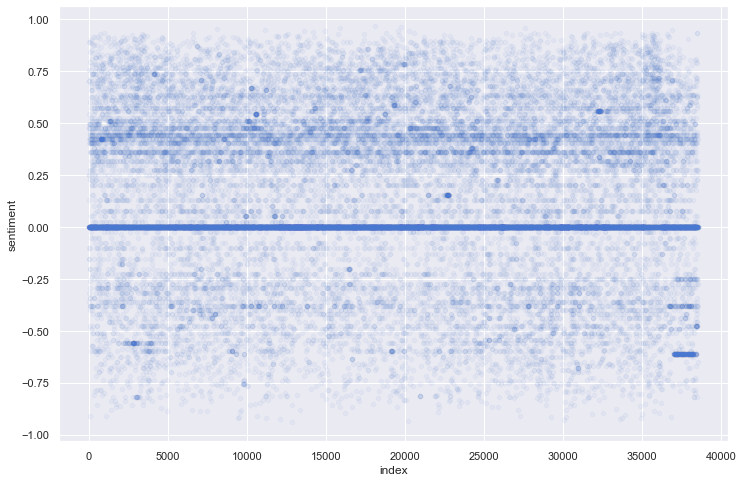

In [346]:
scores_tb = df_tweety_tb['sentiment'].tolist()#pd.Series(np.array(scores))

df_scores_tb = pd.DataFrame(scores).reset_index()
df_scores_tb = df_scores.rename(columns={0: 'sentiment'})

df_scores_tb.plot.scatter(x='index', y='sentiment', alpha=0.05)

In [347]:
df_tweety_tb.sentiment.value_counts()/len(df_tweety)

neutral     0.581023
positive    0.313422
negative    0.105556
Name: sentiment, dtype: float64

VADER polarity scores do not seem to be correlated with user influence.

In [348]:
df_tweety['scores'] = scores

import statsmodels.formula.api as smf
smf.ols(formula='user_infl ~ C(sentiment)', data=df_tweety).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              user_infl   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     26.32
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           3.79e-12
Time:                        16:06:33   Log-Likelihood:            -2.4739e+05
No. Observations:               38520   AIC:                         4.948e+05
Df Residuals:                   38517   BIC:                         4.948e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   53.2875      2.336     22.816      0.000      48.710      57.865
C(sentiment)[T.neutral]     13.9865      2.539      5.509      0.000       9.010      18.963
C(sentiment)[T.positive]     4.1144      2.700      1.524      0.128      -1.178       9.407
==============================================================================
Omnibus:                    49243.126   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6938027.321
Skew:                           7.285   Prob(JB):                         0.00
Kurtosis:                      67.113   Cond. No.                         6.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Sentiments visualization

### Senitments tweets, user status verified vs. non-verified

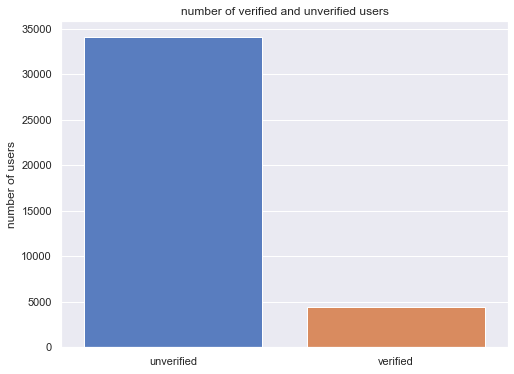

From 38520 accounts, 11.36% have the status 'verified'


In [349]:
sns.set_theme()
sns.set_palette('muted')
plt.figure(figsize = (8,6))
#Print users (verified/unverified), "verified" meaning that they are recognized to have some sort of official character
ax = sns.countplot(x='user_verified', data=df_tweety)
ax.set(xlabel='', ylabel='number of users', title='number of verified and unverified users')
plt.xticks(ticks=[False,True], labels=['unverified','verified'])
plt.show()
print(f'From {df_tweety.shape[0]} accounts, {round(df_tweety.user_verified.mean()*100, 2)}% have the status \'verified\'')

Looking at the influential users status (>400), neutrality is more more common on average.

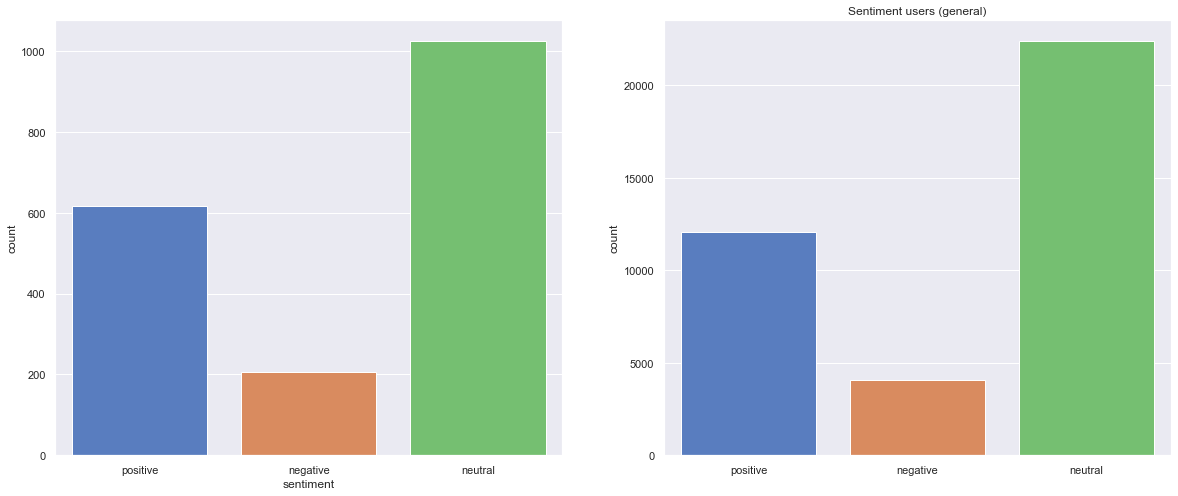

In [350]:
order_list = ['positive', 'negative', 'neutral']
plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='sentiment',data=df_tweety_infl, order = order_list)
ax.set(xlabel='', ylabel='count', title='Sentiment users (most influential 1%)')

plt.subplot(1, 2, 2)
ax = sns.countplot(x='sentiment',data=df_tweety, order = order_list)
ax.set(xlabel='', ylabel='count', title='Sentiment users (general)')
plt.show()

## Sentiments relative to vaccines (extracted from most frequent hashtags)

To track and measure the opinion towards specific vaccines, we evaluate the sentiment of tweets which use a specific vaccine-name as a hashtag and compare them with those that refer to the topic of vaccination in general. If the hashtag mentions a specific vaccine, the likelihood is higher that the sentiment of the tweet has the vaccine as its object of evaluation.

The type names are taken from the set of the most frequently mentioned hashtags.

In [356]:
#Create subframes for plotting the sentiments relative to specific vaccines
df_moderna = df_tweety_vaccs[(df_tweety_vaccs['moderna']==True)]
df_moderna1 = df_moderna[['sentiment']]

df_covaxin = df_tweety_vaccs[(df_tweety_vaccs['covaxin']==True)
                            | (df_tweety_vaccs['bharatbiotech']==True)]
df_covaxin1 = df_covaxin[['sentiment']]

df_vacc = df_tweety_vaccs[(df_tweety_vaccs['vaccine']==True) | 
                          (df_tweety_vaccs['vaccinated']==True) |
                          (df_tweety_vaccs['vaccines']==True) |
                          (df_tweety_vaccs['covidvaccination']==True)|
                          (df_tweety_vaccs['coronavaccine']==True)|
                          (df_tweety_vaccs['covid19vaccination']==True)]
df_vacc1 = df_vacc['sentiment']

df_sinovac = df_tweety_vaccs[(df_tweety_vaccs['sinovac']==True)]
df_sinovac1 = df_sinovac[['sinovac', 'sentiment']]

df_sinopharm = df_tweety_vaccs[(df_tweety_vaccs['sinopharm']==True)]
df_sinopharm1 = df_sinopharm[['sinopharm', 'sentiment']]

df_biontech = df_tweety_vaccs[(df_tweety_vaccs['pfizerbiontech']==True)|
                              (df_tweety_vaccs['pfizer']==True)|
                              (df_tweety_vaccs['pfizervaccine']==True)]
df_biontech1 = df_biontech[['sentiment']]

df_astrazeneca = df_tweety_vaccs[(df_tweety_vaccs['astrazeneca']==True)|
                                (df_tweety_vaccs['oxfordastrazeneca']==True)]
df_astrazeneca1 = df_astrazeneca[['sentiment']]

df_sputnik = df_tweety_vaccs[(df_tweety_vaccs['sputnikv']==True)]
df_sputnik1 = df_sputnik[['sputnikv', 'sentiment']]

df_mrna = df_tweety_vaccs[(df_tweety_vaccs['mrna']==True)]
df_mrna1 = df_mrna[['mrna', 'sentiment']]

[Text(0.5, 0, ''), Text(0, 0.5, 'count'), Text(0.5, 1.0, 'mRNA')]

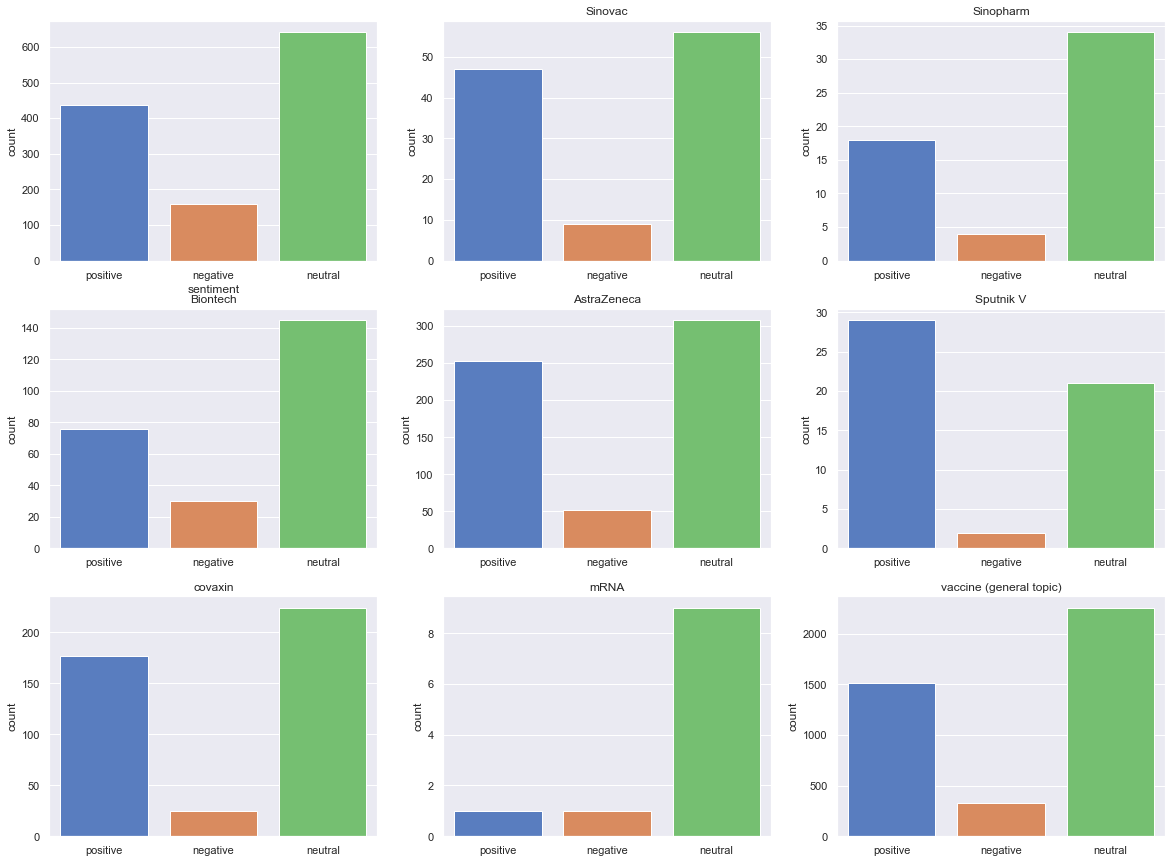

In [357]:
order_list = ['positive', 'negative', 'neutral']

plt.figure(figsize = (20, 15))

plt.subplot(3, 3, 1)
sns.countplot(x='sentiment',data=df_moderna1, order = order_list)
ax.set(xlabel='', ylabel='count', title='Moderna')
plt.subplot(3, 3, 2)
ax = sns.countplot(x='sentiment',data=df_sinovac1, order = order_list)
ax.set(xlabel='', ylabel='count', title='Sinovac')

plt.subplot(3, 3, 3)
ax = sns.countplot(x='sentiment',data=df_sinopharm1, order = order_list)
ax.set(xlabel='', ylabel='count', title='Sinopharm')
plt.subplot(3, 3, 4)
ax = sns.countplot(x='sentiment',data=df_biontech1, order = order_list)
ax.set(xlabel='', ylabel='count', title='Biontech')
plt.subplot(3, 3, 5)
ax = sns.countplot(x='sentiment',data=df_astrazeneca1, order = order_list)
ax.set(xlabel='', ylabel='count', title='AstraZeneca')

plt.subplot(3, 3, 6)
ax = sns.countplot(x='sentiment',data=df_sputnik1, order = order_list)
ax.set(xlabel='', ylabel='count', title='Sputnik V')

plt.subplot(3, 3, 7)
ax = sns.countplot(x='sentiment',data=df_covaxin, order = order_list)
ax.set(xlabel='', ylabel='count', title='covaxin')

plt.subplot(3, 3, 9)
ax = sns.countplot(x='sentiment',data=df_vacc, order = order_list)
ax.set(xlabel='', ylabel='count', title='vaccine (general topic)')

plt.subplot(3, 3, 8)
ax = sns.countplot(x='sentiment',data=df_mrna, order = order_list)
ax.set(xlabel='', ylabel='count', title='mRNA')


In [358]:
#Create subframes for plotting the sentiments relative to specific vaccines
df_modernA = df_tweety_vaccs_infl[(df_tweety_vaccs_infl['moderna']==True)]
df_modernA1 = df_moderna[['moderna', 'sentiment']]

df_covaxiN = df_tweety_vaccs[(df_tweety_vaccs['covaxin']==True)
                            | (df_tweety_vaccs['bharatbiotech']==True)]
df_covaxiN1 = df_covaxin[['sentiment']]

df_vacC = df_tweety_vaccs_infl[(df_tweety_vaccs_infl['vaccine']==True) | 
                          (df_tweety_vaccs_infl['vaccinated']==True) |
                          (df_tweety_vaccs_infl['vaccines']==True) |
                          (df_tweety_vaccs_infl['covidvaccination']==True)|
                          (df_tweety_vaccs_infl['coronavaccine']==True)|
                          (df_tweety_vaccs_infl['covid19vaccination']==True)]
df_vacC1 = df_vacc['sentiment']

df_sinovaC = df_tweety_vaccs_infl[(df_tweety_vaccs_infl['sinovac']==True)]
df_sinovaC1 = df_sinovac[['sinovac', 'sentiment']]

df_sinopharM = df_tweety_vaccs_infl[(df_tweety_vaccs_infl['sinopharm']==True)]
df_sinopharM1 = df_sinopharm[['sinopharm', 'sentiment']]

df_biontecH = df_tweety_vaccs_infl[(df_tweety_vaccs_infl['pfizerbiontech']==True)|
                              (df_tweety_vaccs_infl['pfizer']==True)|
                              (df_tweety_vaccs_infl['pfizervaccine']==True)]
df_biontecH1 = df_biontech[['sentiment']]

df_astrazenecA = df_tweety_vaccs_infl[(df_tweety_vaccs_infl['astrazeneca']==True)|
                                (df_tweety_vaccs_infl['oxfordastrazeneca']==True)]
df_astrazenecA1 = df_astrazeneca[['sentiment']]

df_sputniK = df_tweety_vaccs_infl[(df_tweety_vaccs_infl['sputnikv']==True)]
df_sputniK1 = df_sputnik[['sputnikv', 'sentiment']]

df_mrnA = df_tweety_vaccs_infl[(df_tweety_vaccs_infl['mrna']==True)]
df_mrnA1 = df_mrna[['mrna', 'sentiment']]

## Sentiment by influence

Identify whether the most popular users tweet predominantly positively, negatively or neutrally. Is it possible to see, how their followers tweet? Is there a mutual influence?

Create a measure of influence

In [254]:
twinfluence = df_tweety.groupby(["user_name"])['user_followers'].mean().sort_values(ascending=False)
twinfluence1 = df_tweety.sort_values("user_followers", ascending=False)
#twinfluence1
twinfluence1.drop_duplicates(subset=["user_name"])

,index,user_name,user_location,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,retweets,favorites,day,user_infl,sentiment,subjectivity,scores
36450,36471,NDTV,India,14906907,15,0,True,2021-03-23 07:18:58,blood clot risk top government panel,"[Covishield, Covaxin]",8,80,2021-03-23,1827.0,positive,0.500000,-0.0772
1121,1121,CGTN,"Beijing, China",13714928,69,159,True,2020-12-25 00:38:07,national authority said thursday approved deve...,"[French, vaccine]",12,38,2020-12-25,1753.0,positive,0.300000,0.4767
37397,37418,The Times Of India,New Delhi,13450296,470,5,True,2021-03-24 06:00:00,importer threatens desired price fixed soon via,"[SputnikV, CovidVaccine]",4,32,2021-03-24,1736.0,positive,0.200000,-0.1280
5457,5464,China Xinhua News,"Headquartered in Beijing, PRC",12533116,64,0,True,2021-02-08 03:14:02,1st batch donated arrives cambodia new testame...,"[Sinopharm, COVID19]",10,30,2021-02-08,1676.0,positive,0.454545,0.0000
30230,30250,ABP News,India,10977947,42,132,True,2021-03-16 16:13:50,biotech company begins testing children yrs age,[Moderna],2,14,2021-03-16,1568.0,neutral,0.000000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23675,23695,Simsa,NaN,0,11,141,False,2021-03-07 17:40:10,dear mr president get bharat biotech need real,[],4,4,2021-03-07,4.0,positive,0.300000,0.3818
27952,27972,Nahid Al Islam,"Chattogram,Bangladesh",0,4,0,False,2021-03-18 13:11:00,recent looking kind contract,"[Moderna, Pixel, logo, design, logodesigns, fi...",0,0,2021-03-18,1.0,positive,0.575000,0.5267
25700,25720,bhuvnesh madaan,NaN,0,1,0,False,2021-03-10 12:34:30,aroundper cent people received,"[Pfizer, Moderna]",0,0,2021-03-10,0.0,neutral,0.000000,0.0000
11087,11098,intothebigworld,NaN,0,28,5,False,2021-02-19 19:37:00,ascension island vaccinating population could ...,[],0,2,2021-02-19,2.0,neutral,0.000000,0.0000


In [255]:
f = df_tweety.sort_values(by='user_followers', ascending=False)# groupby(['user_followers', 'sentiment'])['index'].mean().sort_values(ascending=False)
g = f.groupby(['user_name', 'user_followers', 'sentiment'])['index'].count()#.sort_values(ascending=False)
#twinfluence1
g[:20]

user_name                                         user_followers  sentiment
" abc "                                           35              negative     1
"Fantacy Tv" Channel ( A Mirror of News Agency )  70              neutral      1
"Kevin"!                                          94              negative     1
#1                                                0               neutral      1
#1 Handsome Mutt 🐺🇺🇸                              966             neutral      1
#AChildsPrayer: Single Out Now                    1939            neutral      1
#Africa4Palestine                                 23620           neutral      1
#BLM 🐶Pup Mallow 🐾#PackTopaz 🇬🇧🇪🇺 🔞               539             positive     1
#BanglaNijerMeyekeiChay                           696             neutral      1
#Bob                                              1484            positive     1
#BreakingNews                                     349             neutral      1
#BringBackBenches Shaheeda Abdul 

<AxesSubplot:xlabel='day'>

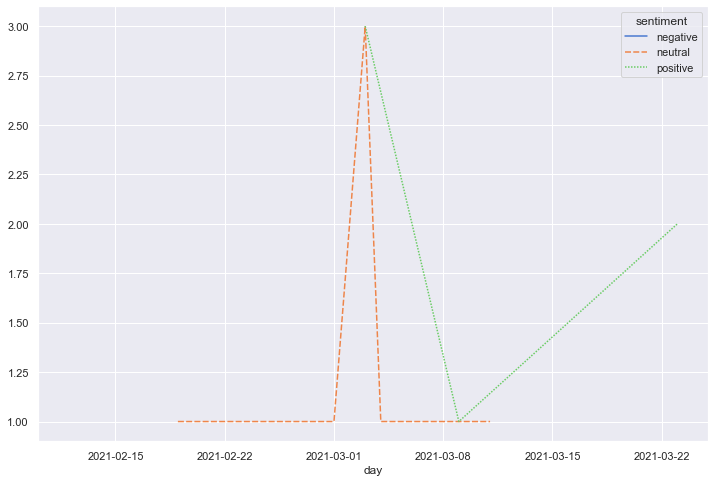

In [256]:
#twinfluence = df_tweety.drop_duplicates(subset=['user_name'])
#twinfluence = pd.DataFrame(df_tweety.groupby(["user_name"])['scores'].mean().sort_values(ascending=False))
twinfluence1 = df_tweety.sort_values("user_followers", ascending=False)
#twinfluence = twinfluence.drop_duplicates(subset=['user_name'])
NDTV = df_tweety[df_tweety['user_name']=='NDTV']
#a = pd.pivot_table(NDTV, index=[day], columns=['sentiment'])
#a = NDTV.groupby(['day', 'sentiment'])['index'].count()
a = pd.pivot_table(NDTV, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)
a
#plt.subplot(1, 2, 2)
sns.lineplot(data=a)


[Text(0.5, 0, ''), Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Russia Today')]

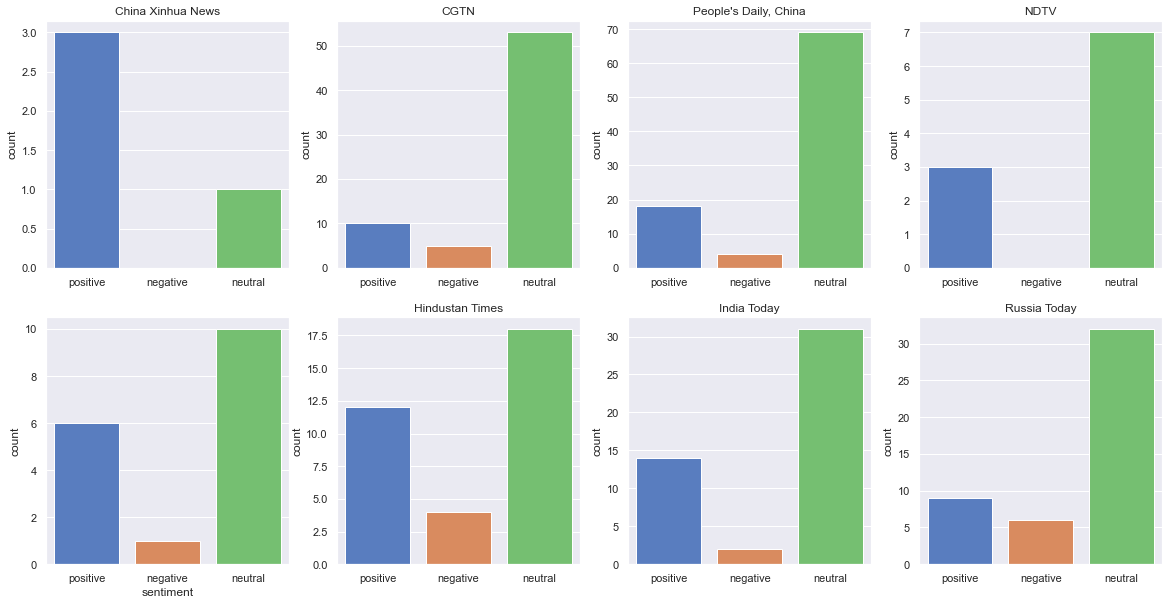

In [397]:
NDTV = df_tweety[df_tweety['user_name']=='NDTV']
CGTN = df_tweety[df_tweety['user_name']=='CGTN']
TTOI = df_tweety[df_tweety['user_name']=='The Times Of India']
CXN = df_tweety[df_tweety['user_name']=='China Xinhua News']
ABP = df_tweety[df_tweety['user_name']=='ABP News']
HT = df_tweety[df_tweety['user_name']=='Hindustan Times']
PDC = df_tweety[df_tweety['user_name']=='People\'s Daily, China']
TH = df_tweety[df_tweety['user_name']=='The Hindu']
IT = df_tweety[df_tweety['user_name']=='IndiaToday']
ZNE = df_tweety[df_tweety['user_name']=='Zee News English']
N18 = df_tweety[df_tweety['user_name']=='News18']
CD = df_tweety[df_tweety['user_name']=='China Daily']
ET = df_tweety[df_tweety['user_name']=='Economic Times']
DDN = df_tweety[df_tweety['user_name']=='DD News']
RT = df_tweety[df_tweety['user_name']=='RT']



order_list = ['positive', 'negative', 'neutral']

plt.figure(figsize = (20, 10))

plt.subplot(2, 4, 1)
ax = sns.countplot(x='sentiment',data=CXN, order = order_list)
ax.set(xlabel='', ylabel='count', title='China Xinhua News')

plt.subplot(2, 4, 2)
ax = sns.countplot(x='sentiment',data=CGTN, order = order_list)
ax.set(xlabel='', ylabel='count', title='CGTN')

plt.subplot(2, 4, 3)
ax = sns.countplot(x='sentiment',data=PDC, order = order_list)
ax.set(xlabel='', ylabel='count', title='People\'s Daily, China')

plt.subplot(2, 4, 4)
ax = sns.countplot(x='sentiment',data=CD, order = order_list)
ax.set(xlabel='', ylabel='count', title='China Daily')

plt.subplot(2, 4, 5)
sns.countplot(x='sentiment',data=NDTV, order = order_list)
ax.set(xlabel='', ylabel='count', title='NDTV')

plt.subplot(2, 4, 6)
ax = sns.countplot(x='sentiment',data=HT, order = order_list)
ax.set(xlabel='', ylabel='count', title='Hindustan Times')

plt.subplot(2, 4, 7)
ax = sns.countplot(x='sentiment',data=IT, order = order_list)
ax.set(xlabel='', ylabel='count', title='India Today')

plt.subplot(2, 4, 8)
ax = sns.countplot(x='sentiment',data=RT, order = order_list)
ax.set(xlabel='', ylabel='count', title='Russia Today')

### General user influence by 'user_follower'

<AxesSubplot:xlabel='user_followers', ylabel='user_name'>

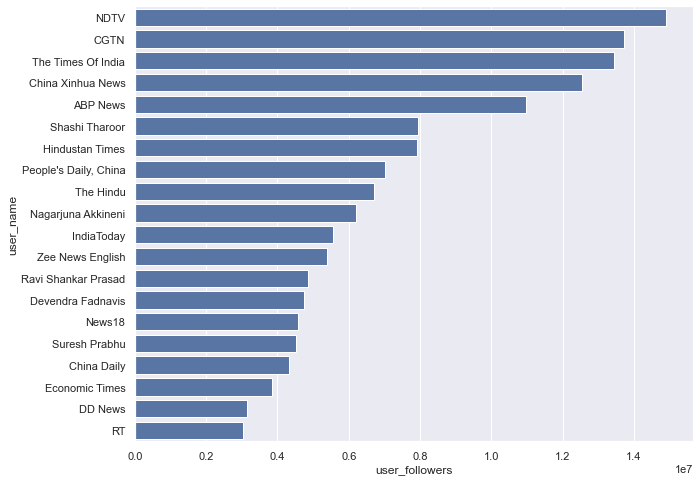

In [394]:

twinfluence1 = df_tweety.sort_values("user_infl", ascending=False).reset_index(drop=True)
#twinfluence1 = pd.DataFrame(twinfluence)
twinfluence1 = twinfluence1.drop_duplicates(subset=['user_name'])
#.drop_duplicates(subset=['user_name'], keep='last')
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='user_followers', y='user_name', orient='h', color='b', data=twinfluence1[['user_name', 'user_followers']][:20])

In [115]:
sns.barplot(x="user_followers", y="user_name", ax=ax1, palette=["b"],
           data=df_tweety_infl[(df_tweety_infl.sentiment== "positive")]\
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
#ax1.set_title('Top 10 Accounts with Highest Followers who tweet Positive')



<AxesSubplot:title={'center':'Top 10 Accounts with Highest Followers who tweet Positive'}, xlabel='user_followers', ylabel='user_name'>

### Top retweeted retweeted tweets for sentiments

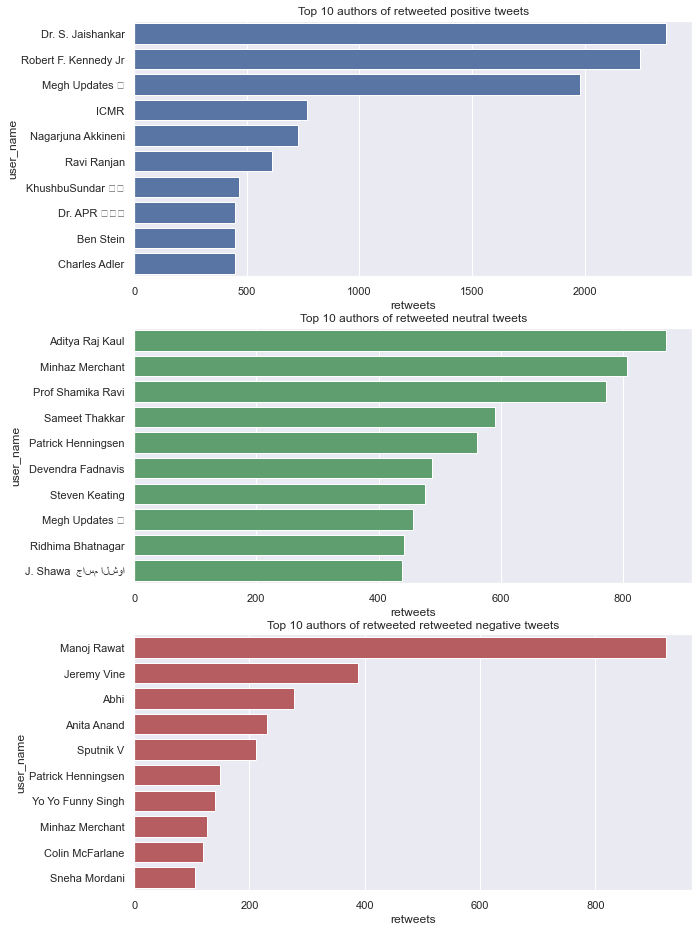

In [398]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 16))
sns.barplot(x="retweets", y="user_name", ax=ax1, palette=["b"],
           data=df_tweety[(df_tweety.sentiment== "positive")]
           .drop_duplicates(subset=["user_name"])
           .sort_values(by=["retweets"], ascending=False)[["user_name", "retweets"]][:10])
ax1.set_title('Top 10 authors of retweeted positive tweets')
sns.barplot(x="retweets", y="user_name", ax=ax2, palette=["g"],
           data=df_tweety[(df_tweety.sentiment == "neutral")]
           .drop_duplicates(subset=["user_name"])
           .sort_values(by=["retweets"], ascending=False)[["user_name", "retweets"]][:10])
ax2.set_title('Top 10 authors of retweeted neutral tweets')
sns.barplot(x="retweets", y="user_name", ax=ax3, palette=["r"],
           data=df_tweety[(df_tweety.sentiment == "negative")]
           .drop_duplicates(subset=["user_name"])
           .sort_values(by=["retweets"], ascending=False)[["user_name", "retweets"]][:10])
ax3.set_title('Top 10 authors of retweeted retweeted negative tweets')

fig.show()

In [95]:
# delete multiples for certain purposes! Written

### 'user_favourites'

<AxesSubplot:xlabel='user_favourites', ylabel='user_name'>

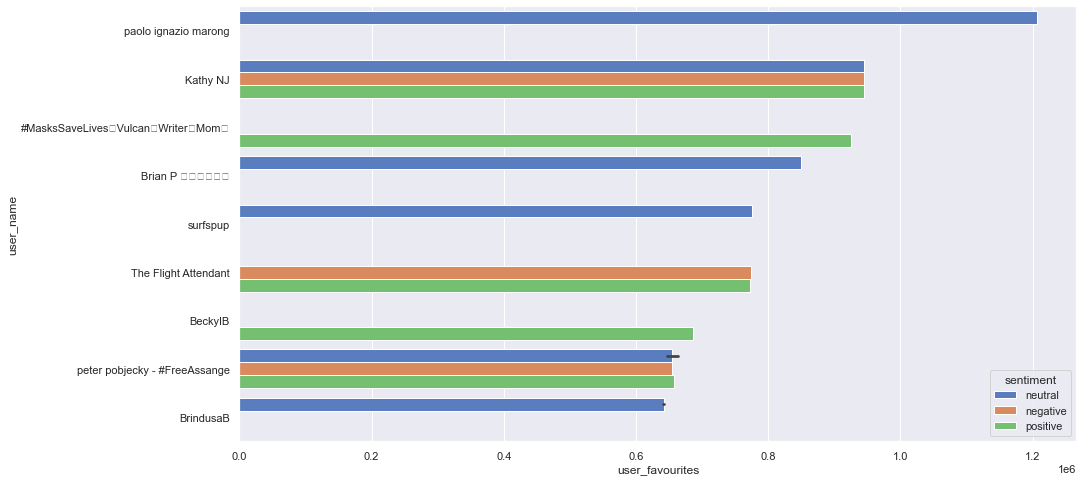

In [97]:
twinfluence3 = df_tweety.sort_values("user_favourites", ascending=False)

f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='user_favourites', y='user_name',  hue='sentiment', orient='h', data=twinfluence3[['user_name', 'user_favourites', 'sentiment']][:20])

# Tweet over time, sentiment conponents

## General

<AxesSubplot:xlabel='day'>

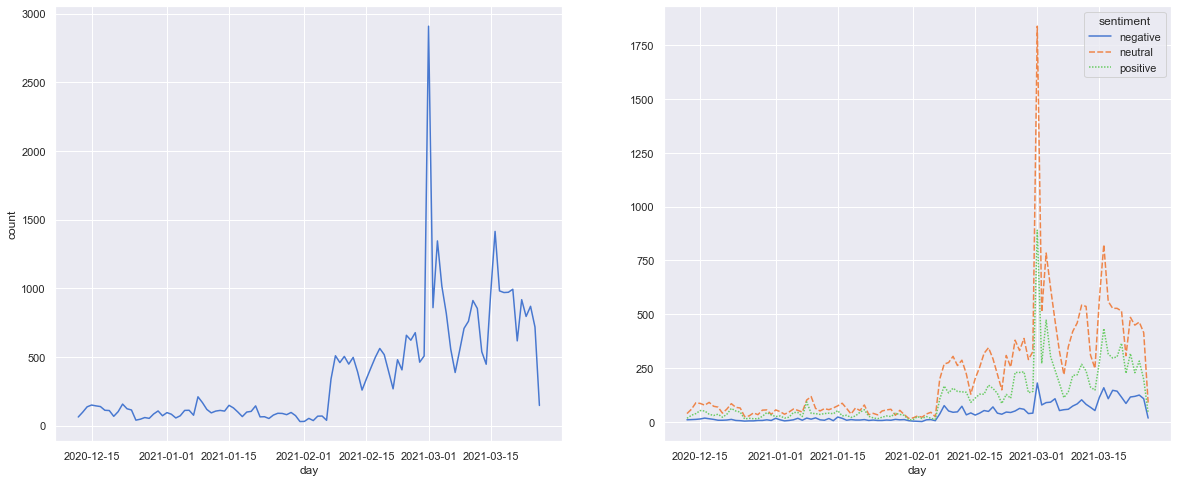

In [265]:
over_days = df_tweety.groupby(['day'])['index'].count().reset_index()
over_days.columns = ['day', 'count']

tweety_wide = pd.pivot_table(df_tweety, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
sns.lineplot(x="day", y="count",
             data=over_days)

plt.subplot(1, 2, 2)
sns.lineplot(data=tweety_wide)

<AxesSubplot:xlabel='day'>

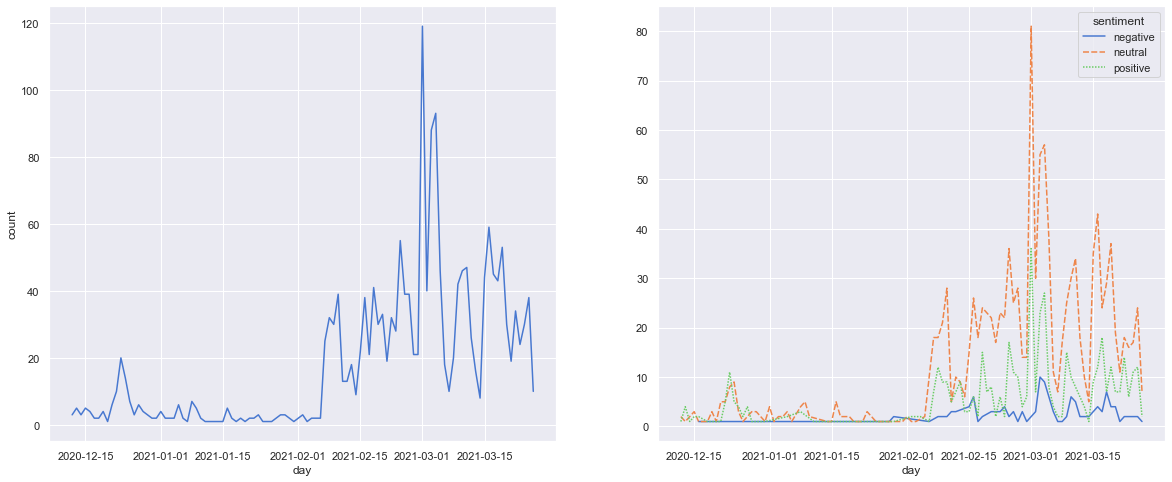

In [266]:
over_days = df_tweety_infl.groupby(['day'])['index'].count().reset_index()
over_days.columns = ['day', 'count']

tweety_wide = pd.pivot_table(df_tweety_infl, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
sns.lineplot(x="day", y="count",
             data=over_days)

plt.subplot(1, 2, 2)
sns.lineplot(data=tweety_wide)

In [267]:
df_tweety_infl2 = df_tweety_infl[df_tweety_infl['user_infl']>500]

<AxesSubplot:xlabel='day'>

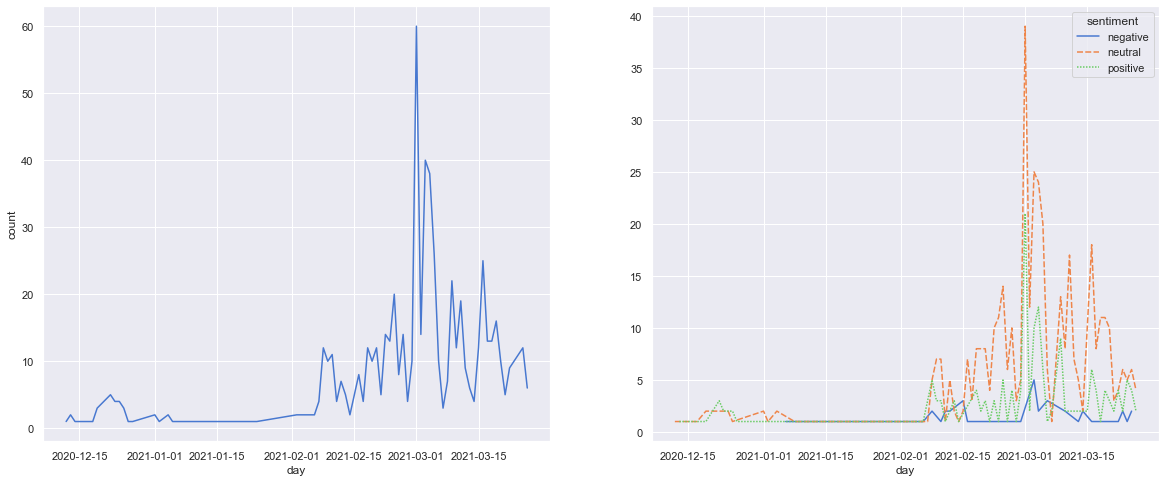

In [268]:
over_days2 = df_tweety_infl2.groupby(['day'])['index'].count().reset_index()
over_days2.columns = ['day', 'count']

tweety_wide2 = pd.pivot_table(df_tweety_infl2, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
sns.lineplot(x="day", y="count",
             data=over_days2)

plt.subplot(1, 2, 2)
sns.lineplot(data=tweety_wide2)

What happened on the first of march, in mid-february and in mid-march?

## Vaccines

### Moderna

<AxesSubplot:xlabel='day'>

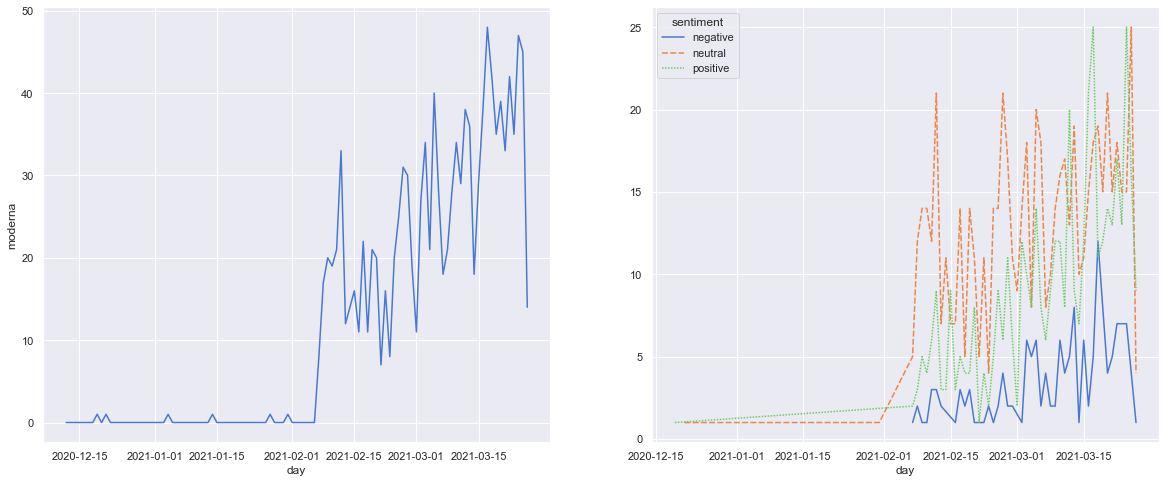

In [359]:
moderna1 = df_tweety_vaccs.groupby(['day'])['moderna'].sum()#, index='day', columns=['sentiment'], values='index', aggfunc=pd.Series.nunique)
moderna1 = pd.DataFrame(moderna1).reset_index()

moderna2 = pd.pivot_table(df_moderna, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
sns.lineplot(x="day", y="moderna", data=moderna1)

plt.subplot(1, 2, 2)
sns.lineplot(data=moderna2)

### Covaxin

<AxesSubplot:xlabel='day'>

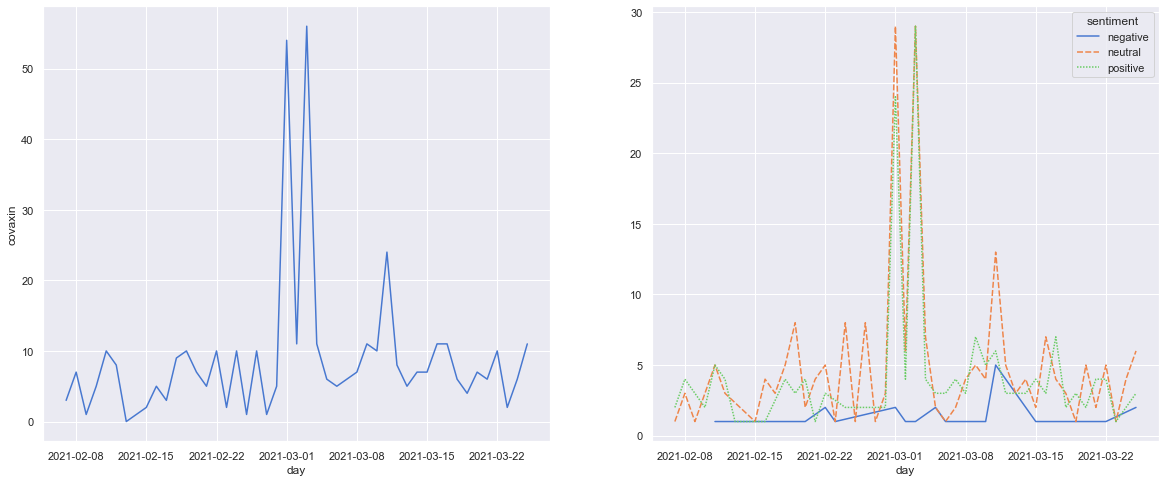

In [361]:
covaxin1 = df_covaxin.groupby(['day'])['covaxin'].sum()#, index='day', columns=['sentiment'], values='index', aggfunc=pd.Series.nunique)
covaxin1 = pd.DataFrame(covaxin1).reset_index()

covaxin2 = pd.pivot_table(df_covaxin, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
sns.lineplot(x="day", y="covaxin", data=covaxin1)

plt.subplot(1, 2, 2)
sns.lineplot(data=covaxin2)

### AstraZeneca

<AxesSubplot:xlabel='day'>

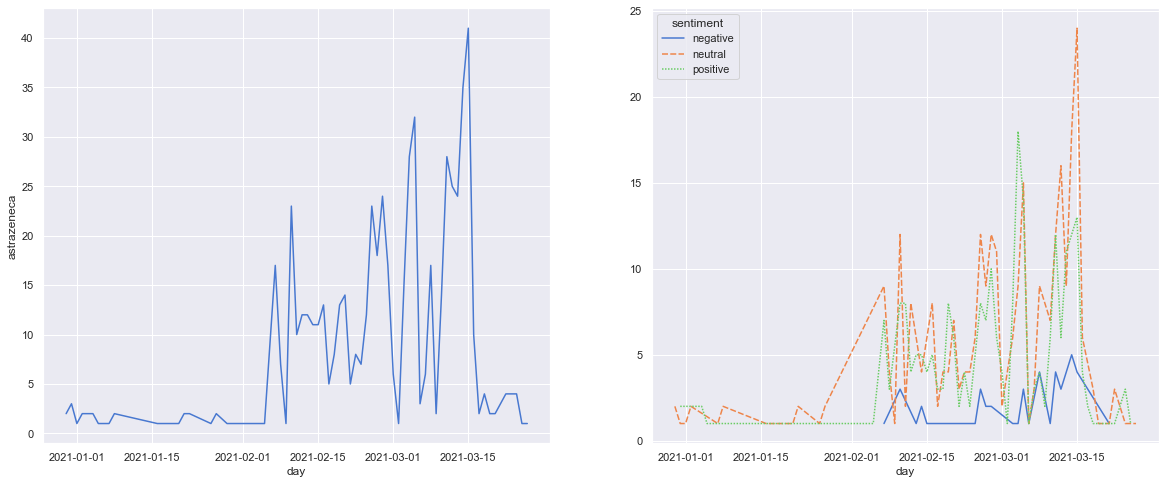

In [362]:
astrazeneca1 = df_astrazeneca.groupby(['day'])['astrazeneca'].count()#, index='day', columns=['sentiment'], values='index', aggfunc=pd.Series.nunique)
astrazeneca1 = pd.DataFrame(astrazeneca1).reset_index()

astrazeneca = pd.pivot_table(df_astrazeneca, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
sns.lineplot(x="day", y="astrazeneca", data=astrazeneca1)

plt.subplot(1, 2, 2)
sns.lineplot(data=astrazeneca)

<AxesSubplot:xlabel='day'>

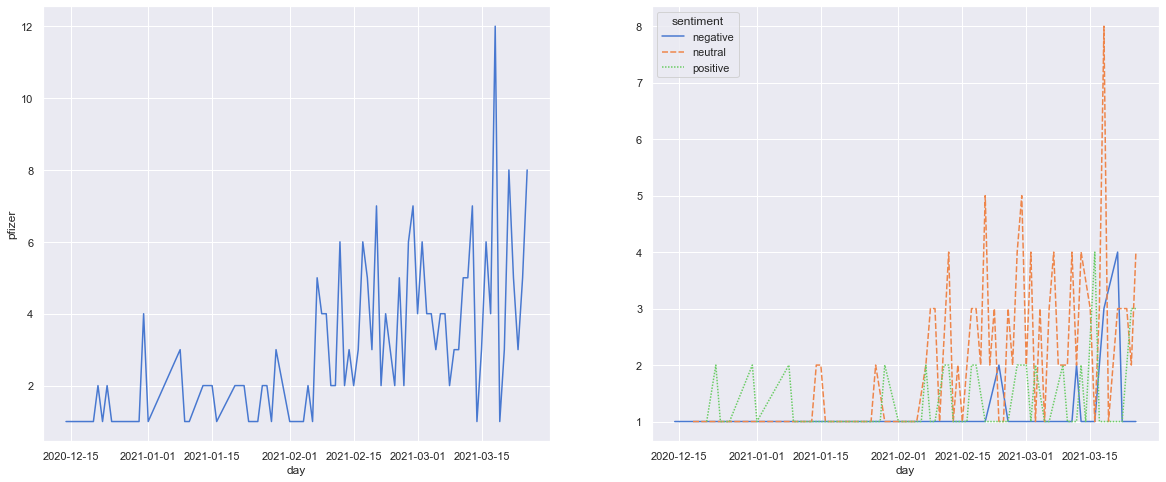

In [363]:
pfizer1 = df_biontech.groupby(['day'])['pfizer'].count()#, index='day', columns=['sentiment'], values='index', aggfunc=pd.Series.nunique)
pfizer1 = pd.DataFrame(pfizer1).reset_index()

pfizer = pd.pivot_table(df_biontech, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
sns.lineplot(x="day", y="pfizer", data=pfizer1)

plt.subplot(1, 2, 2)
sns.lineplot(data=pfizer)

<AxesSubplot:xlabel='day'>

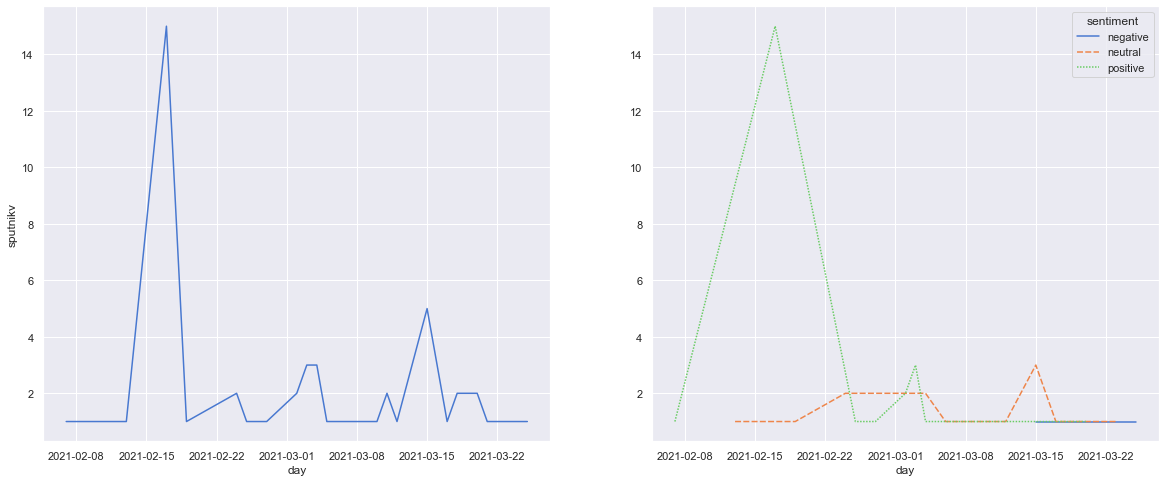

In [364]:
sputnik1 = df_sputnik.groupby(['day'])['sputnikv'].sum()#, index='day', columns=['sentiment'], values='index', aggfunc=pd.Series.nunique)
sputnik1 = pd.DataFrame(sputnik1).reset_index()


sputnik = pd.pivot_table(df_sputnik, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
sns.lineplot(x="day", y="sputnikv", data=sputnik1)

plt.subplot(1, 2, 2)
sns.lineplot(data=sputnik)

<AxesSubplot:xlabel='day'>

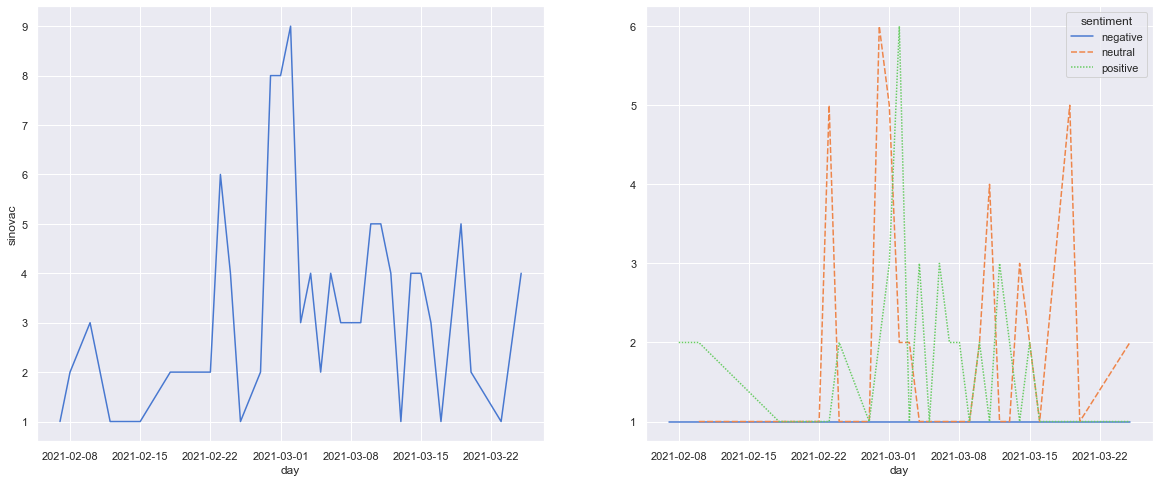

In [365]:
sinovac1 = df_sinovac.groupby(['day'])['sinovac'].sum()#, index='day', columns=['sentiment'], values='index', aggfunc=pd.Series.nunique)
sinovac1 = pd.DataFrame(sinovac1).reset_index()

sinovac = pd.pivot_table(df_sinovac, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
sns.lineplot(x="day", y="sinovac", data=sinovac1)

plt.subplot(1, 2, 2)
sns.lineplot(data=sinovac)

### Unanimous sentiment values VADER, BLOB

In [109]:
blob_sent = pd.read_csv('blob_sent.csv')

In [110]:
blob_sent

,Unnamed: 0,sentiment
0,0,negative
1,1,negative
2,2,neutral
3,3,neutral
4,4,neutral
...,...,...
38542,38542,neutral
38543,38543,neutral
38544,38544,neutral
38545,38545,positive


In [111]:
df_tweety['blob_sent'] = blob_sent['sentiment']

In [112]:
df_tweety

,index,user_name,user_location,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,retweets,favorites,day,sentiment,blob_sent
0,0,Rachel Roh,"La Crescenta-Montrose, CA",405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat cytok...,[PfizerBioNTech],0,0,2020-12-20,positive,negative
1,1,Albert Fong,"San Francisco, CA",834,666,178,False,2020-12-13 16:27:13,"While world wrong side history year, hopefully...",[],1,1,2020-12-13,negative,negative
2,2,eli🇱🇹🇪🇺👌,Your Bed,10,88,155,False,2020-12-12 20:33:45,Russian vaccine created last - years…,"[coronavirus, SputnikV, AstraZeneca, PfizerBio...",0,0,2020-12-12,positive,neutral
3,3,Charles Adler,"Vancouver, BC - Canada",49165,3933,21853,True,2020-12-12 20:23:59,"Facts immutable, Senator, even ethically sturd...",[],446,2129,2020-12-12,neutral,neutral
4,4,Citizen News Channel,NaN,152,580,1473,False,2020-12-12 20:17:19,Explain need vaccine,"[whereareallthesickpeople, PfizerBioNTech]",0,0,2020-12-12,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38515,38542,Rising Bharat,Village,625,0,0,False,2021-03-18 06:22:41,Sputnikreview emergency use authorization Indi...,[],1,7,2021-03-18,negative,positive
38516,38543,Bright Uzbekistan,Uzbekistan,18,182,59,False,2021-03-18 06:13:08,IT IS PLANNED TO START MASS VACCINATION IN UZB...,[],0,0,2021-03-18,neutral,neutral
38517,38544,Sputnik V,"Moscow, Russia",223700,142,678,True,2021-03-18 06:01:50,Austrian Chancellor Sebastian Kurz: Concerning...,[SputnikV],83,226,2021-03-18,positive,neutral
38518,38545,Sputnik,NaN,322326,306,24,True,2021-03-18 05:30:00,Norwegian politicians calling cut vaccine deal...,[SputnikV],6,16,2021-03-18,negative,neutral


In [113]:
df_unanim = df_tweety[df_tweety['sentiment']==df_tweety['blob_sent']]

In [114]:
df_unanim.shape

(16014, 15)

In [115]:
df_unanim = df_unanim.drop(['blob_sent'], axis=1).reset_index(drop=True)
df_unanim

,index,user_name,user_location,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,retweets,favorites,day,sentiment
0,1,Albert Fong,"San Francisco, CA",834,666,178,False,2020-12-13 16:27:13,"While world wrong side history year, hopefully...",[],1,1,2020-12-13,negative
1,3,Charles Adler,"Vancouver, BC - Canada",49165,3933,21853,True,2020-12-12 20:23:59,"Facts immutable, Senator, even ethically sturd...",[],446,2129,2020-12-12,neutral
2,4,Citizen News Channel,NaN,152,580,1473,False,2020-12-12 20:17:19,Explain need vaccine,"[whereareallthesickpeople, PfizerBioNTech]",0,0,2020-12-12,neutral
3,5,Dee,"Birmingham, England",105,108,106,False,2020-12-12 20:11:42,Does anyone useful advice/guidance whether COV...,[],0,0,2020-12-12,positive
4,7,Dr.Krutika Kuppalli,NaN,21924,593,7815,True,2020-12-12 20:04:29,There many bright days best . winning,"[BidenHarris, Election2020]",2,22,2020-12-12,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16009,38537,WealthPK,NaN,231,372,471,False,2021-03-18 06:49:39,"🇵🇰 ratio jumped .% today country reported , ne...","[Pakistan, coronavirus, positivity]",0,2,2021-03-18,neutral
16010,38540,Raj Meister,"Leeds, England",1354,247,2931,False,2021-03-18 06:37:29,Here’s killer manufactured &amp;,"[BrainTwister, Putin, MotherRussia, SputnikV, ...",0,0,2021-03-18,negative
16011,38541,Stankevicius International,"Dublin, Ireland",16,3,0,False,2021-03-18 06:29:12,Selling: Contact sales: o…,"[NitrileGloves, FaceMasks, Vaccines, SputnikV,...",0,0,2021-03-18,neutral
16012,38543,Bright Uzbekistan,Uzbekistan,18,182,59,False,2021-03-18 06:13:08,IT IS PLANNED TO START MASS VACCINATION IN UZB...,[],0,0,2021-03-18,neutral


In [116]:
df_unanim.senitment#.value_counts()#/len(df_unanim)

AttributeError: 'DataFrame' object has no attribute 'senitment'

### Create dataframe for vaccination progress and sentiments over time

In [ ]:
tweety_wide = pd.pivot_table(df_tweety, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

In [ ]:
tweety_flat = pd.DataFrame(tweety_wide.to_records()).drop([0, 102, 103]).reset_index()

In [ ]:
alltweets_global_vacc_senti = pd.read_csv('Data/df_global.csv')

In [ ]:
alltweets_global_vacc_senti[['negative', 'neutral', 'positive']] = tweety_flat[['negative', 'neutral', 'positive']]

In [ ]:
alltweets_global_vacc_senti.to_csv('Data/alltweetsglobal_vacc_senti.csv')